In [79]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

In [80]:
def f(x):
    if x < 0.25:
        return x
    elif x >= 0.25 and x <= 0.5:
        return x+0.5
    else:
        return 1-(x-0.5)*2

In [81]:
def f(x):
    if x <= 0.5:
        return np.sin(x*3)
    else:
        return np.sin((1-x)*3)


In [82]:
def heat_kernel(x, y, gamma, d):
    return ((2*np.pi)**(-d/2))*(gamma**(-d))*np.exp((-(x-y)**2)/(2*gamma**2))

In [83]:
N = 1000
grid = np.arange(1/N,1,1/N)#datagrid


In [84]:
N = 999
matrix = np.zeros((N, N))

for i in range(0,N):
    for j in range(0,N):
        if i < j:
            matrix[i,j] = grid[i]
        else:
            matrix[i,j] = grid[j]
        

In [85]:
gamma = 0.01
#calculation of the right hand side of the normal equation
n = 100
grid_ = np.arange(0,1,1/n)#recongrid
norm_dat = np.zeros((N,n))
for j in range(0,n):#size of the recon_grid
    tmp = np.zeros((N))
    for i in range(0,N):
        #tmp[i] = integrate.quad(lambda y: heat_kernel(grid_[j], y, gamma, 1), 0, grid[i])[0]#
        tmp[i] = integrate.fixed_quad(heat_kernel, 0, grid[i], (grid_[j], gamma, 1), 70)[0]
        #tmp[i] = integrate.quadrature(heat_kernel, 0, grid[i], (grid_[j], gamma, 1), tol=0.02, maxiter=70)[0]
    norm_dat[:,j] = tmp


In [86]:
theta = 0.001
recon_kernel_grid = np.zeros((N,n))
recon_kernel_grid = np.linalg.solve(matrix, norm_dat)
#recon_kernel_grid = np.linalg.solve(matrix+theta*np.eye(N), norm_dat)


In [87]:
data = []
for i in range(0,N):
    data.append(integrate.quad(lambda x: f(x), 0, grid[i])[0])
data = np.array(data)

g = data
print(np.linalg.norm(g-data)/np.linalg.norm(data))
g = np.reshape(g, (N,1))

0.0


In [88]:
gamma = 0.06
#calculation of the right hand side of the normal equation
n = 100
grid_ = np.arange(0,1,1/n)#recongrid
norm_dat_ = np.zeros((N,n))
for j in range(0,n):#size of the recon_grid
    tmp = np.zeros((N))
    for i in range(0,N):
        #tmp[i] = integrate.quad(lambda y: heat_kernel(grid_[j], y, gamma, 1), 0, grid[i])[0]#
        tmp[i] = integrate.fixed_quad(heat_kernel, 0, grid[i], (grid_[j], gamma, 1), 70)[0]
        #tmp[i] = integrate.quadrature(heat_kernel, 0, grid[i], (grid_[j], gamma, 1), tol=0.02, maxiter=70)[0]
    norm_dat_[:,j] = tmp


In [89]:
theta = 0.001
recon_kernel_grid_ = np.zeros((N,n))
recon_kernel_grid_ = np.linalg.solve(matrix, norm_dat_)
#recon_kernel_grid_ = np.linalg.solve(matrix+theta*np.eye(N), norm_dat_)


In [90]:
epsilon = (np.random.rand(1,N)-0.5)
epsilon = np.reshape(epsilon, (N))
epsilon = (epsilon/np.linalg.norm(epsilon))*np.linalg.norm(data)*0.05
g_ = data+epsilon
print(np.linalg.norm(g_-data)/np.linalg.norm(data))
g_ = np.reshape(g_, (N,1))

0.05


In [91]:

solution_grid = np.transpose(g)@recon_kernel_grid
solution_grid_ = np.transpose(g_)@recon_kernel_grid_


0.013509843376527258


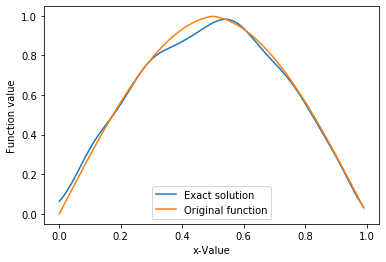

In [92]:
import matplotlib.pyplot as plt
solution_grid_ = np.reshape(solution_grid_, (n))

plt.plot(grid_, solution_grid_, label='Exact solution')
true_function = []
for val in grid_:
    true_function.append(f(val))
plt.plot(grid_, true_function, label='Original function')
plt.xlabel('x-Value')
plt.ylabel('Function value')
plt.legend()
print(np.linalg.norm(np.array(true_function)-solution_grid))

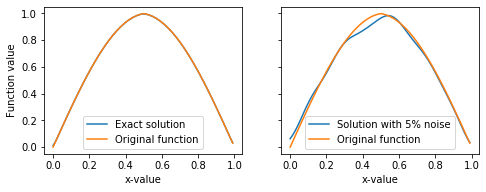

In [93]:
import matplotlib.pyplot as plt
solution_grid = np.reshape(solution_grid, (n))
solution_grid_ = np.reshape(solution_grid_, (n))
fig, axs = plt.subplots(1, 2, figsize=(7.5, 3), sharey=True)
fig.subplots_adjust(bottom=0.2,right=0.93)
axs[0].plot(grid_, solution_grid, label='Exact solution')
axs[0].plot(grid_, true_function, label='Original function')
axs[1].plot(grid_, solution_grid_, label='Solution with 5% noise')
axs[1].plot(grid_, true_function, label='Original function')

axs[0].set_xlabel('x-value')
axs[0].set_ylabel('Function value')
axs[1].set_xlabel('x-value')
axs[0].legend()
axs[1].legend()
#fig.legend()
plt.savefig('sin-func_', format='pdf')